# Housing Price Prediction using a Neural Network

## Objective
In this exercise, you will:
1. Create a synthetic dataset for housing prices based on a linear equation.
2. Build and train a simple neural network with one neuron to predict housing prices.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

---

## Step 2: Create a Synthetic Dataset
We will create a dataset for housing prices that follows the equation

$\text{price}$ = $\text{number of bedrooms}$ $\times  x$ + $\text{base price}$


In [2]:
# Number of samples
n_samples = 1000

# Generate random number of bedrooms between 1 and 5
bedrooms = np.random.randint(1, 6, n_samples)

# Constants for the equation
x = 0.5  # The price added per bedroom in onehundred thousands
base_price = 1  # Base price of a house in onehundred thousands

# Generate housing prices based on the equation
prices = bedrooms * x + base_price

# Create a DataFrame
df = pd.DataFrame({'bedrooms': bedrooms, 'price': prices})

# Show the first few rows
df.head()

,bedrooms,price
0,5,3.5
1,3,2.5
2,1,1.5
3,4,3.0
4,5,3.5


---

## Step 3: Visualize the Data
Plot the data to visualize the relationship between the number of bedrooms and the price.


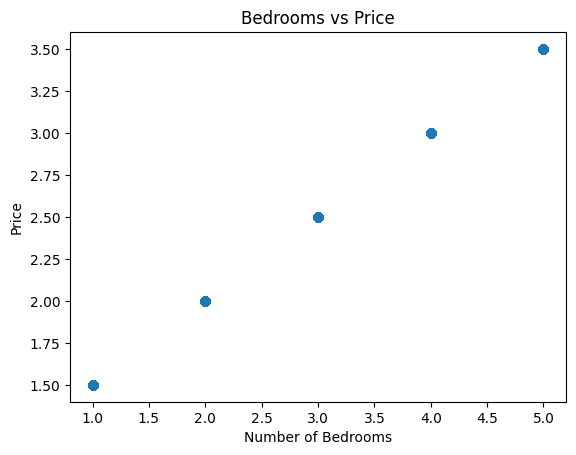

In [18]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()


---

## Step 4: Preprocess the Data
Split the data into features (`X`) and labels (`y`), and then into training and testing sets.


In [9]:
# Features and Labels
X = df[['bedrooms']]
y = df['price']

# TODO Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200, test_size=0.2)


---

## Step 5: Build a Neural Network
Build a simple neural network with one neuron to predict the house prices.
Pick an optimizer and a loss function that suits this problem.


In [14]:
# TODO Create the model
model = tf.keras.Sequential([

    # Define the input shape
    tf.keras.Input(shape=(1,)),

    # Add a Dense layer
    tf.keras.layers.Dense(units=1)
    ])

# TODO Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# TODO print a Summary of the model
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

---

## Step 6: Train the Model
Train the model using the training data.


In [15]:
# TODO Train the model
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3403  
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.1957
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.1627
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.1360
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1203 
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.1000
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.0851
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0718 
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0568 
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0486  
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0408 
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0351 
Epoch 13/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0303 
Epoch 14/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0249 
Epoch 15/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

---

## Step 7: Evaluate the Model
Evaluate the model using the test data and plot its prediction.


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 2.0106e-12
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


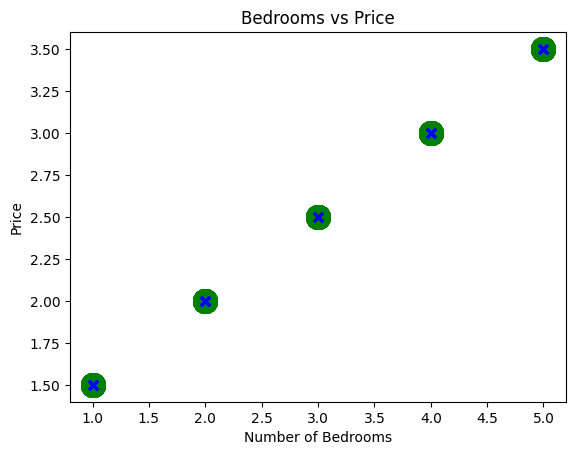

In [30]:
# TODO Evaluate the model using the model.evaluate() function
model.evaluate(X_train, y_train)

# TODO Make predictions
predicted=model.predict(X_test, verbose=1)

# TODO Plot real vs predicted prices (hint: you can use the plotting code from above as a start)
plt.scatter(X_test, y_test, color='green', marker='o', linewidths=12)
plt.scatter(X_test, predicted, color='blue', marker='x')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()


# Step 8: Optional
Go back to the start and experiment what happens if instead of representing a price of a house costing onehundred thousand by a 1 we use the raw number 100,000 instead.

Try to explain what happened and why.